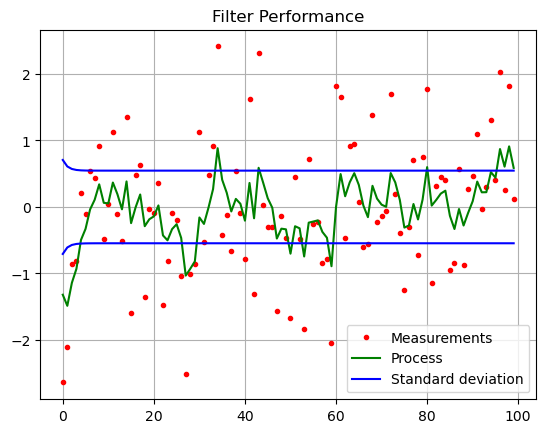

In [1]:
from numpy import array, eye, random, arange, sqrt, exp
from numpy.linalg import inv
import matplotlib.pyplot as plt

# System parameters
dt = 1                   # [second]
samples = 100            # number of samples

# Filter parameters
sigmax = 1               # [meter]
beta = .1                # [radian/second]

phi = array([[exp(-beta*dt)]])
H = array([[1]])
R = array([[1]])  # Wrong R                    # [meter^2]
Q = array([[sigmax**2*(1 - exp(-2*beta*dt))]]) # [meter^2/second]

# Initial values
x = array([[0]])         # [meter]
P = array([[sigmax**2]]) # [meter^2]

# Plot vectors
x_all = []; P_all = []; z_all = []; std = []

# Main KF loop
for k in range(0, samples):
    
    # Measurement
    z = random.normal(0, sqrt(R[0, 0]))
    
    # Time update
    xp = phi@x
    Pp = phi@P@phi.T + Q
    
    # Kalman gain
    K = Pp@H.T@inv(H@Pp@H.T + R)
    
    # Measurement update
    x = xp + K@(z - H@x)
    P = (eye(1) - K@H)@Pp@(eye(1) - K@H).T + K@R@K.T
    
    # Accumulate plot vectors
    x_all.append(x)
    P_all.append(P)
    z_all.append(z)

# Extract plot vectors
x_est = [x[0] for x in x_all]
std = [sqrt(P[0, 0]) for P in P_all]
    
# Time vector
time = arange(0, samples)*dt

plt.title('Filter Performance')
plt.plot(time, z_all, 'r.', label='Measurements')
plt.plot(time, x_est, 'g', label='Process')
plt.plot(time, std, 'b', label='Standard deviation')
plt.plot(time, [-x for x in std], 'b')
plt.legend()
plt.grid()
plt.show()